In [2]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [5]:
workspace = Path("D:\LUNA23-ISMI-Group7")
model_id = "20230509_0_malignancy/fold0/"
tasks = ["malignancy"]

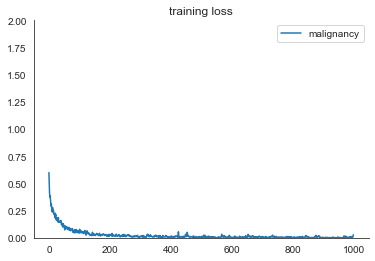

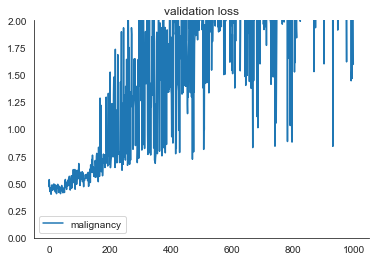

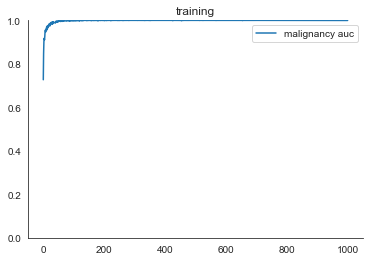

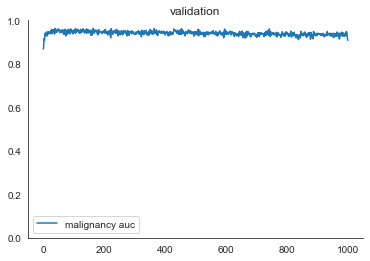

In [6]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task]["loss"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 2])
    sns.despine()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "noduletype": "balanced_accuracy"
}

for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    sns.despine()